<a href="https://colab.research.google.com/github/RobDBennett/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics
(blue/brown- 2,7,9)

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [1]:
def calcy(data):
  n= len(data)
  mean = sum(data) / n
  var_res = sum([(xi - mean) **2 for xi in data]) / (n - 1)
  std = var_res ** (1.0/2)
  return print(mean, var_res, std)
sam1= [3505, 2400, 3027, 2798, 3700, 3250, 2689]

calcy(sam1)


3052.714285714286 214387.90476190473 463.0204150595357


In [2]:
from scipy import stats
import numpy as np
import pandas as pd
mean = np.mean(sam1)
std = stats.tstd(sam1)
var_res = np.var(sam1, ddof=1)
print(mean)
print(var_res)
print(std)

3052.714285714286
214387.90476190473
463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [9]:
sam2 = [127, 80, 105, 92, 120, 115, 93]
data = {'a':sam1, 'b':sam2}
df = pd.DataFrame(data)
df.cov()

,a,b
a,214387.904762,7604.357143
b,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.) (Correlation coefficient should be between -1 and 1)

In [0]:
def corco(data1, data2):
  n1 = len(data1)
  n2 = len(data2)
  m1 = sum(data1) / n1
  m2 = sum(data2) / n2
  top1 = [(xi - m1) for xi in data1] 
  top2 = [(yi - m2) for yi in data2]
  top1 = np.array(top1)
  top2 = np.array(top2)
  b1 = sum([(xi - m1)**2 for xi in data1]) 
  b2 = sum([(yi - m2)**2 for yi in data2])
  r = sum(top1*top2) / ((b1 **(1.0/2)) * (b2 **(1.0/2)))
  return r

In [5]:
corco(sam1, sam2)

0.9628339778148909

In [6]:
np.corrcoef(sam2, sam1)[0,1]

0.9628339778148909

In [22]:
def std1(data):
  n= len(data)
  mean = sum(data) / n
  var_res = sum([(xi - mean) **2 for xi in data]) / (n - 1)
  std = var_res ** (1.0/2)
  return std
cust = std1(sam2)
sales = std1(sam1)
hoping = cust*sales
hoping

7897.890309308459

In [23]:
print("Standard Deviation Product", hoping)
print("Correlation between sales and customers", corco(sam1, sam2))

Standard Deviation Product 7897.890309308459
Correlation between sales and customers 0.9628339778148909


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [10]:
!wget https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv

--2020-05-19 20:39:11--  https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137509 (134K) [text/plain]
Saving to: ‘titanic_clean.csv’

titanic_clean.csv   100%[===================>] 134.29K  --.-KB/s    in 0.02s   

2020-05-19 20:39:11 (5.57 MB/s) - ‘titanic_clean.csv’ saved [137509/137509]



In [29]:
df1 = pd.read_csv('titanic_clean.csv')
print(df.shape)
df.head()

(1310, 15)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [30]:
df1.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [31]:
df1.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


### I'm not sure if I'm supposed to leave that unnamed column, but I hate it, so here is the data without it since I don't think it adds anything to our metrics.

In [0]:
df = df.drop(['Unnamed: 0'], axis=1)

In [27]:
df.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [28]:
df.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

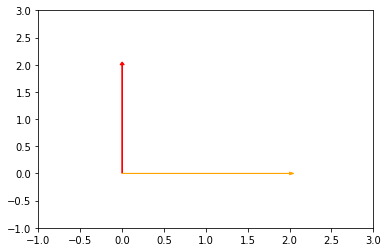

In [34]:
import matplotlib.pyplot as plt

vec1 = [0, 2]
vec2 = [2, 0]

plt.arrow(0,0,vec1[0],vec1[1], head_width=.05, head_length=.05, color='red')
plt.arrow(0,0,vec2[0],vec2[1], head_width=.05, head_length=.05, color='orange')
plt.xlim(-1,3)
plt.ylim(-1,3)
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [35]:
a= np.array([-5, 3,7])
b= np.array([6, -8, 2])
np.dot(a,b)

-40

With a dot value of -40, I don't believe they are orthogonal.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c= np.array([2, -15, 6, 20])
dot= c @ c

In [0]:
normsqrt= np.linalg.norm(c) **2

In [0]:
cT= c.T
d2= cT @ c

In [42]:
print("C norm squared:", normsqrt)
print("C dot C value:", dot)
print("C-transverse x C:", d2)

C norm squared: 665.0
C dot C value: 665
C-transverse x C: 665


They are all the same! Not sure what that means, but its cool that they're all the same.

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

For reference
\begin{align}
Identity Matrix =\begin{bmatrix}
  1 & 0 & 0 \\
  0 & 1 & 0 \\
  0 & 0 & 1
\end{bmatrix}
\end{align}

Vectors as Linear Combinations of Scalars
\begin{align}
d =7 \begin{bmatrix}
1 \\ 0
\end{bmatrix} + 12 \begin{bmatrix} 0 \\ 1 \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 0 \end{bmatrix} + \begin{bmatrix} 0 \\ 12 \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\end{align}

\begin{align}
e =2 \begin{bmatrix}
1 \\ 0 \\ 0
\end{bmatrix} + 11 \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} + -8 \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}
\end{align}
\begin{align}
e = \begin{bmatrix}
2 \\ 0 \\ 0
\end{bmatrix} +  \begin{bmatrix} 0 \\ 11 \\ 0 \end{bmatrix} +  \begin{bmatrix} 0 \\ 0 \\ -8 \end{bmatrix}
\end{align}
\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix}
\end{align}


## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [43]:
# unit vector = vector / vector_norm. 
f = np.array([4, 12, 11, 9, 2])
norm = np.linalg.norm(f)
unit_v = f / norm
unit_v

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

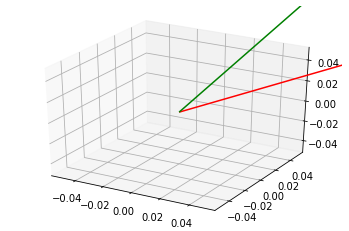

In [79]:
from mpl_toolkits.mplot3d import Axes3D
dep1 = np.array([0,0,0,5,6,2])
dep2 = np.array([0,0,0,.5,5,2])
x1, y1, z1, u1, v1, w1 = zip(dep1)
x2, y2, z2, u2, v2, w2 = zip(dep2)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.quiver(x1,y1,z1,u1,v1,w1, length=1, color='red')
ax.quiver(x2,y2,z2,u2,v2,w2, length=1, color='green')
plt.show()

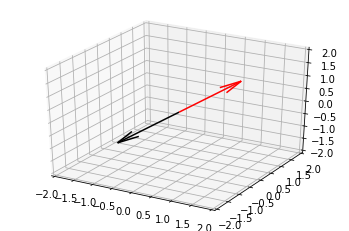

In [80]:
dep1 = np.array([0,0,0,1,1,1])
dep2 = np.array([0,0,0,-1,-1,-1])
x3, y3, z3, u3, v3, w3 = zip(dep1)
x4, y4, z4, u4, v4, w4 = zip(dep2)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.quiver(x3,y3,z3,u3,v3,w3, length=1, color='red')
ax.quiver(x4,y4,z4,u4,v4,w4, length=1, color='black')
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_zlim([-2,2])
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
#.... I mean... these are multiples of each other, so their lines should lay 
# top of eachother, so they should have all numbers, right?

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [74]:
# put into matrix, calculate the Rank.
np.linalg.matrix_rank([[1,2,3],[-1,0,7],[4,8,2]])

3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



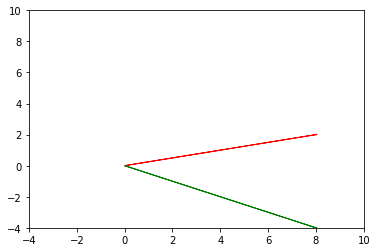

In [76]:
# The collection { i + j, i − j} is a basis for R 2. So, lets say that i=5, j=3 and i=2 and j=6
bv1 = [8, 2]
bv2 = [8, -4]
plt.arrow(0,0,bv1[0], bv1[1], head_width=.05, head_length=.05, color='red')
plt.arrow(0,0,bv2[0],bv2[1],head_width=.05, head_length=.05, color='green')
plt.xlim(-4,10)
plt.ylim(-4,10)
plt.show()

## 6.2 What does it mean to form a basis?

These are linearly independent, so we know that we can use scalars to find vectors within a dimenson of space, like the shadow in Ryan's hand example? 

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [81]:
np.linalg.matrix_rank([[1,2,3],[-1,0,7],[4,8,2]])

3

## 7.2 What does the rank of a matrix tell us?

I want to say that it's related to the R basis, which I feel is related to the dimensional space the vectors form?

# Linear Projections (STRETCH GOALS START HERE)

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

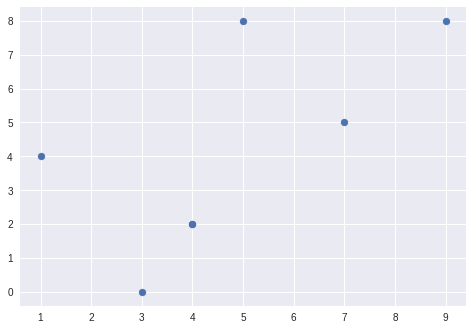

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()